## Matplotlib Real Life Examples

#### Install the dependencies.

In [ ]:
!pip install matplotlib
!pip install pandas

#### Import the dependencies.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from GraphHelper import rand_color, rand_pattern

#### Get data from CSV.

In [ ]:
csv_data = pd.read_csv("../data.csv")

def get_csv_column(column):
    return csv_data[column].tolist()

### Papers per year

#### Define the data that would be used.

In [ ]:
years = get_csv_column("Year")
years_counter = Counter(years)
years_sorted = sorted(years_counter.items(), key=lambda x: x[0])
x = [x[0] for x in years_sorted]
y = [x[1] for x in years_sorted]


#### Create plot.

In [ ]:
plt.rc("hatch", linewidth=1)

patches = plt.bar(x, y)
for index, patch in enumerate(patches):
    patch.set_color(rand_color())
    patch.set_hatch(rand_pattern())
    patch.set_edgecolor("white")
    plt.annotate(y[index], (x[index], y[index] + 4), color="red", fontsize=16, ha="center")

plt.yticks(np.arange(np.min(y), np.max(y) + 30, 20))
plt.xlabel("Year")
plt.ylabel("Count of papers".title())
plt.title("Papers per year".title())    
plt.show()

### Countries with more papers

#### Define the data that would be used.

In [173]:
countries = []
for x in get_csv_column("Country/Location"):
    countries.extend([z.strip() for z in x.split(",")])
    
countries_counter = Counter(countries)
countries_sorted = sorted(countries_counter.items(), key=lambda x:x[1], reverse=True)

graph_countries = countries_sorted[:10]
others_countries = countries_sorted[10:]

sum_others_countries = sum([x[1] for x in others_countries])
graph_countries.append(("Others", sum_others_countries))

labels = [x[0] for x in graph_countries]
data = [x[1] for x in graph_countries]

#### Create plot.

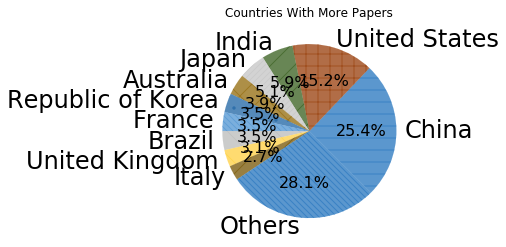

In [205]:
patches, texts, autotexts = plt.pie(
    data,
    labels=labels,
    autopct="%1.1f%%",
    startangle=-45,
    wedgeprops={"edgecolor": "white", "linewidth": 0.1},
)

for patch, text, autotext in zip(patches, texts, autotexts):
    patch.set_alpha(0.8)
    patch.set_hatch(rand_pattern())
    patch.set_color(rand_color())
    
    text.set_fontsize(24)
    autotext.set_fontsize(16)
    autotext.set_ha("center")
    autotext.set_va("center")
    autotext.set_color("black")


# plt.legend(patches, [f"{x[0]} ({x[1]})" for x in graph_countries], loc="best")
plt.title("Countries with more papers".title())

plt.show()